<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 de PLN, 18 del curso

### Importamos la librería específica para el  procesamiento del lenguaje

[Natural language tool kit](https://www.nltk.org/)

In [52]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importamos los datos

In [53]:




df = pd.read_csv("/content/spam.csv", encoding='latin-1', names=['etiqueta', 'mensaje', 'c3', 'c4', 'c5'], header=1) # You might need to specify encoding

# Display the first few rows of the DataFrame
df.head()

,etiqueta,mensaje,c3,c4,c5
0,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
2,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
4,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [54]:
df.shape

(5571, 5)

In [55]:
df.isnull().sum()

,0
etiqueta,0
mensaje,0
c3,5521
c4,5559
c5,5565


In [56]:
df_clean = df.drop(['c3', 'c4', 'c5'], axis=1)
df_clean.head()

,etiqueta,mensaje
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [57]:
df_clean.shape

(5571, 2)

### Añadimos una nueva columna con la longitud de los mensajes

In [58]:
df_clean['longitud'] = df_clean['mensaje'].apply(len)
df_clean.head()

,etiqueta,mensaje,longitud
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148


### Analisis de la longitud de los mensajes

<Axes: ylabel='Frequency'>

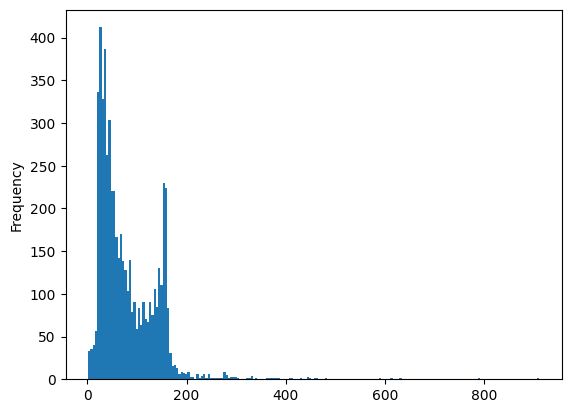

In [59]:
df_clean['longitud'].plot.hist(bins=200)

In [60]:
df_clean['longitud'].describe()

,longitud
count,5571.000000
mean,80.113265
std,59.694764
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


### identificar el mensaje más largo

In [61]:
df_clean[df_clean['longitud'] == 910]['mensaje'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [62]:
df_clean.iloc[df_clean['longitud'].idxmax()]['mensaje']

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Longitud de los mensajes en función de la etiqueta

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

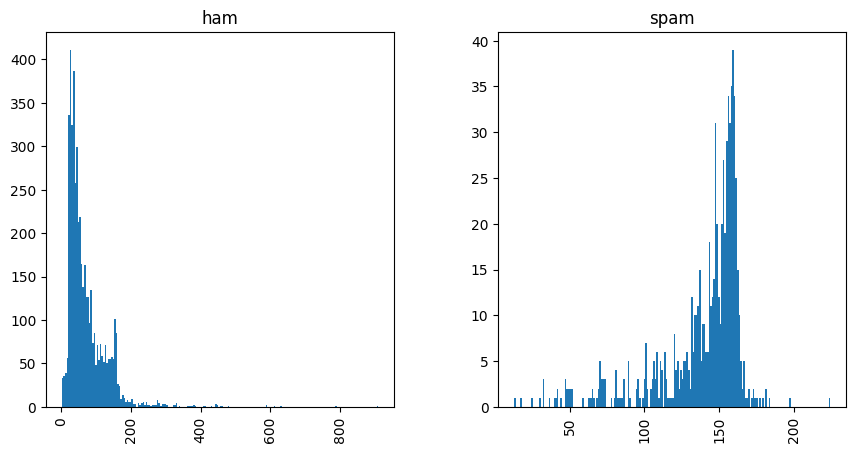

In [63]:
df_clean.hist(column='longitud', by='etiqueta', bins=200, figsize=(10,5))

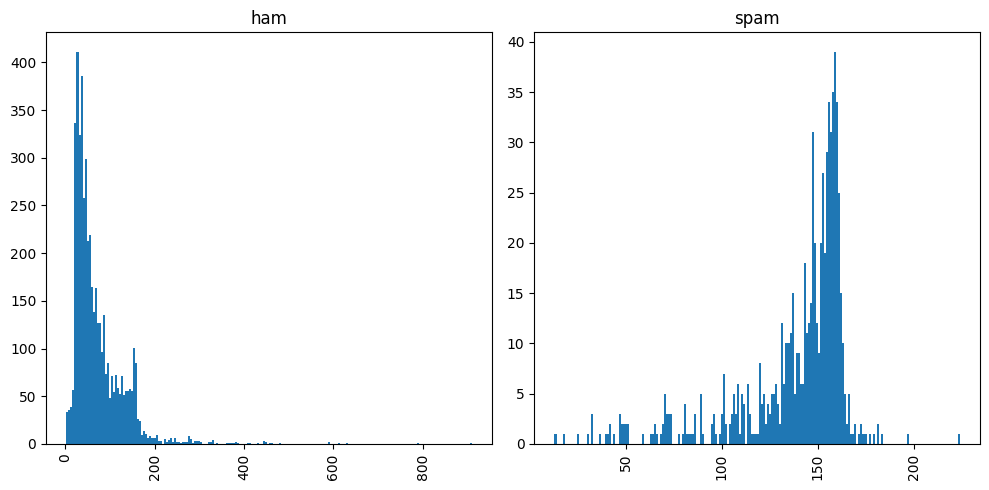

In [64]:
# Generate the histograms and get the axes objects
axes = df_clean.hist(column='longitud', by='etiqueta', bins=200, figsize=(10,5))

# Iterate through the axes and set the aspect ratio
for ax in axes.flatten(): # Use flatten() to handle cases where axes is a 2D array
    ax.set_aspect('auto', adjustable='box')

# Adjust layout to prevent overlapping titles or labels
plt.tight_layout()

# Display the plot
plt.show()

## Tratamiento de los textos

+ Nos apoyamos en la librería string.

+ Quitaremos los signos de puntuación

+ Quitaremos los stop words del lenguage en el que están los textos

In [65]:
import string

#### Un texto de ejemplo para practicar

In [66]:
ejemplo = "Estoy mirando el partido de Carlos y Lorenzo. Representan a Españya y a Italia. ¡¡¡ Una pasada !!! Los dos tienen mucho tenis. ¿Quién ganará?"


In [67]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##### Pero atención que no aparece nuestros '¡' o '¿'

In [68]:
ejemplo_sin_puntuacion = [char for char in ejemplo if char not in string.punctuation]

###### Esto nos crea una lista de letras y espacios en blanco ....

In [69]:
ejemplo_sin_puntuacion

['E',
 's',
 't',
 'o',
 'y',
 ' ',
 'm',
 'i',
 'r',
 'a',
 'n',
 'd',
 'o',
 ' ',
 'e',
 'l',
 ' ',
 'p',
 'a',
 'r',
 't',
 'i',
 'd',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'C',
 'a',
 'r',
 'l',
 'o',
 's',
 ' ',
 'y',
 ' ',
 'L',
 'o',
 'r',
 'e',
 'n',
 'z',
 'o',
 ' ',
 'R',
 'e',
 'p',
 'r',
 'e',
 's',
 'e',
 'n',
 't',
 'a',
 'n',
 ' ',
 'a',
 ' ',
 'E',
 's',
 'p',
 'a',
 'ñ',
 'y',
 'a',
 ' ',
 'y',
 ' ',
 'a',
 ' ',
 'I',
 't',
 'a',
 'l',
 'i',
 'a',
 ' ',
 '¡',
 '¡',
 '¡',
 ' ',
 'U',
 'n',
 'a',
 ' ',
 'p',
 'a',
 's',
 'a',
 'd',
 'a',
 ' ',
 ' ',
 'L',
 'o',
 's',
 ' ',
 'd',
 'o',
 's',
 ' ',
 't',
 'i',
 'e',
 'n',
 'e',
 'n',
 ' ',
 'm',
 'u',
 'c',
 'h',
 'o',
 ' ',
 't',
 'e',
 'n',
 'i',
 's',
 ' ',
 '¿',
 'Q',
 'u',
 'i',
 'é',
 'n',
 ' ',
 'g',
 'a',
 'n',
 'a',
 'r',
 'á']

##### ... que tenemos que recomponer en un único string

In [70]:
ejemplo_sin_puntuacion = ''.join(ejemplo_sin_puntuacion)
ejemplo_sin_puntuacion

'Estoy mirando el partido de Carlos y Lorenzo Representan a Españya y a Italia ¡¡¡ Una pasada  Los dos tienen mucho tenis ¿Quién ganará'

##### tenemos que elaborar nuestro propio conjunto de signos de puntuación

In [71]:
puntuación_española = string.punctuation + '¡' +'¿'
ejemplo_sin_puntuacion = [c for c in ejemplo if c not in puntuación_española]
ejemplo_sin_puntuacion = ''.join(ejemplo_sin_puntuacion)
ejemplo_sin_puntuacion

'Estoy mirando el partido de Carlos y Lorenzo Representan a Españya y a Italia  Una pasada  Los dos tienen mucho tenis Quién ganará'

#####importamos las stop_words de la lengua española

In [72]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_española = set(stopwords.words('spanish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### ¿De cuántas lenguas han recopilado stopwords los creadores del corpus de nltk?

In [73]:
lenguas = stopwords.fileids()

print(f"Hay {len(lenguas)} lenguas en el corpus de stopwords de NLTK.")
print("Las lenguas son:", lenguas)

Hay 32 lenguas en el corpus de stopwords de NLTK.
Las lenguas son: ['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


In [74]:
ejemplo_limpio = [palabra for palabra in ejemplo_sin_puntuacion.split() \
                  if palabra.lower() not in stopwords_española]

In [75]:
ejemplo_limpio = ' '.join(ejemplo_limpio)
ejemplo_limpio

'mirando partido Carlos Lorenzo Representan Españya Italia pasada dos tenis Quién ganará'

### Definición de la función procesar texto

In [76]:
def procesar_texto(cadena, lengua = 'english'):
  if lengua not in stopwords.fileids():
    raise ValueError(f"La lengua {lengua} no está en el corpus de stopwords de NLTK.")
  if lengua == 'spanish':
    puntuación_lengua = string.punctuation + '¡' +'¿'
  else:
    puntuación_lengua = string.punctuation
  stopwords_lengua = set(stopwords.words(lengua))
  cadena_sin_puntuacion = [c for c in cadena if c not in puntuación_lengua]
  cadena_sin_puntuacion = ''.join(cadena_sin_puntuacion)
  cadena_limpia = [palabra for palabra in cadena_sin_puntuacion.split() \
                  if palabra.lower() not in stopwords_lengua]
  #cadena_limpia = ' '.join(cadena_limpia)
  return cadena_limpia


In [77]:
ejemplo_limpio = procesar_texto(ejemplo, 'spanish')
print(ejemplo_limpio)

['mirando', 'partido', 'Carlos', 'Lorenzo', 'Representan', 'Españya', 'Italia', 'pasada', 'dos', 'tenis', 'Quién', 'ganará']


##Tratamiento del dataset spam.csv

In [78]:
df_clean['mensaje'].head(5).apply(procesar_texto)

,mensaje
0,"[Ok, lar, Joking, wif, u, oni]"
1,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,"[U, dun, say, early, hor, U, c, already, say]"
3,"[Nah, dont, think, goes, usf, lives, around, t..."
4,"[FreeMsg, Hey, darling, 3, weeks, word, back, ..."


### Vectorización

vamos a construir una matriz en la que por un lado tendremos la primera columna con los mensajes y a continuación una columna por cada palabra del diccionario de nuestros mensajes.

Para cada mensaje tendremos una informacion de si la palabra está o no está en el mensaje.

Nos vamos a apoyar en la función **CountVectorizer** de la librería **sklearn.feature_extraction.text**

+ CountVector necesita un analizador. El analizador es la función procesar anterior.
+ CountVector necesita ser entrenado. Usamos los mensajes
+ CountVector devuelve un transformador:
  + El transformador tiene:
    
    + **Atributos**:
      + `vocabulary_`: Este es un diccionario que mapea cada palabra única en el vocabulario a un índice entero. La clave es la palabra (token) y el valor es el índice asignado. Es útil para entender el vocabulario que el transformador ha aprendido.

      + `stop_words_`: Si stop_words se estableció durante la inicialización de CountVectorizer, este atributo contendrá la lista de palabras vacías que se excluyeron del vocabulario.

      + `analyzer`: Este atributo almacena la función que se utiliza para procesar el texto antes de la tokenización. En tu caso, es la función procesar_texto.

    + **Métodos**:

      + `transform(raw_documents)`: Este es uno de los métodos más importantes. Toma una lista de documentos de texto sin procesar (raw_documents) y los transforma en una matriz de recuentos de tokens. La matriz resultante tendrá tantas filas como documentos de entrada y tantas columnas como palabras en el vocabulario. Los valores en la matriz representarán la frecuencia de cada palabra en cada documento.

      + `fit(raw_documents, y=None)`: Aprende el vocabulario a partir de una lista de documentos de texto sin procesar. Este método se utiliza para entrenar el transformador.

      + `fit_transform(raw_documents`, y=None): Realiza tanto el ajuste (aprendizaje del vocabulario) como la transformación en una sola operación. Es conveniente cuando quieres entrenar y transformar tus datos de entrenamiento al mismo tiempo.

      + `get_feature_names_out()`: Devuelve una lista con los nombres de las características (es decir, las palabras del vocabulario) en el orden en que aparecen en la matriz de recuentos. Esto es útil para saber a qué palabra corresponde cada columna en la matriz transformada.

      + `inverse_transform(X)`: Realiza la operación inversa de transform(). Toma una matriz de recuentos de tokens (X) y devuelve una lista de documentos de texto correspondientes. Esto es útil para reconstruir el texto original a partir de la representación vectorizada.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
transformador = CountVectorizer(analyzer=procesar_texto).fit(df_clean['mensaje'])

In [85]:
print(type(transformador.vocabulary_.items()))

<class 'dict_items'>


In [87]:
num_vocablos = len(transformador.vocabulary_)
print(f"El número de palabras del vocabulario es {num_vocablos}")
print(f"Como muestra del vocabulario mostramos las 10 primeras palabras :{list(transformador.vocabulary_.items())[0:10]}")

El número de palabras del vocabulario es 11301
Como muestra del vocabulario mostramos las 10 primeras palabras :[('Ok', 3011), ('lar', 7597), ('Joking', 2406), ('wif', 10949), ('u', 10579), ('oni', 8479), ('Free', 1908), ('entry', 6242), ('2', 422), ('wkly', 11000)]


##### Funcionamiento de la transformación

Aplicaremos una transoformación a un mensaje, veremos los tokens y su frecuencia y convertiremos esos tokens en features.

In [88]:
mensaje7 = df_clean['mensaje'][6]
print(mensaje7)

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


In [89]:
mensaje7_transformado = transformador.transform([mensaje7])

##### ¿Que tipo de dato devuelve el transformador?

Una matriz dispersa compactada

In [92]:
type(mensaje7_transformado)


scipy.sparse._csr.csr_matrix

In [93]:
mensaje7_transformado

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15 stored elements and shape (1, 11301)>

In [94]:
print(mensaje7_transformado)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15 stored elements and shape (1, 11301)>
  Coords	Values
  (0, 898)	1
  (0, 1399)	1
  (0, 1400)	1
  (0, 2763)	2
  (0, 2782)	1
  (0, 2971)	1
  (0, 3045)	1
  (0, 3218)	1
  (0, 4094)	1
  (0, 5208)	1
  (0, 5630)	1
  (0, 6630)	1
  (0, 8685)	1
  (0, 9244)	1
  (0, 9551)	1


##### ¿puedo identificar a que vocablo corresponde un token del mensaej transformado?

Si, usando el método del transformador `get_featurre_names_out()`

In [97]:
print(transformador.get_feature_names_out()[5208])
print(transformador.get_feature_names_out()[9244])
print(transformador.get_feature_names_out()[1399])

callertune
request
Callers


## Predicción de Spam



In [98]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


#### Dividimos los mensajes em mensajes de entrenamiento y de test

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['mensaje'], df_clean['etiqueta'], test_size=0.2, random_state=42)


#### Creamos un pipeline con las operaciones que deseamos realizar:

+ vectorizar: con una instancia del CountVectorizer()
+ transformar: con una instancia del TfidTransformer()
+ clasificar : con una instancia del RandomForestClassifier()

EL pipeline es una instancia del objeto Pipeline()  con un atributo lista de entrada. La lista de entrada son tuplas del tipo (operacion, objeto)

In [102]:
pipeline = Pipeline([ \
 ('vectorizar', CountVectorizer(analyzer=procesar_texto)), \
 ('transformar', TfidfTransformer()), \
 ('calsificar', RandomForestClassifier()) \
                      ])

#### Entrenamiento del Pipeline


In [103]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizar',
                 CountVectorizer(analyzer=<function procesar_texto at 0x794248500040>)),
                ('transformar', TfidfTransformer()),
                ('calsificar', RandomForestClassifier())])

#### Predicciones para los datos de prueba

In [105]:
y_pred = pipeline.predict(X_test)

#### Evaluación del modelo

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       959
        spam       1.00      0.83      0.91       156

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



####  Nueva Predicción

In [107]:
X_new =" the CEO decide to pursue with your commercial offert. Press *9 to copy your friends Callertune"
y_new = pipeline.predict([X_new])
print(y_new)

['ham']
